# Decision Trees - Class Exercise 2

## Introduction

Customer churn is a major problem and one of the most important concerns for large companies. Due to the direct impact on the revenues generated, especially in the telecommunications field, companies are seeking to develop means to predict potential customers that will churn. Therefore, finding factors that correlate with customer churn is important for companies to take necessary actions to reduce this churn.

The data set includes information about:
* Customers who left within the last month – this column is called Churn
* Services that each customer signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they have been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic information about customers – gender, age range, and if they have partners and dependents

Our goal is to build a decision tree a model to predict customer churn behaviour to retain customers.

## Metadata

| Variables          | Description                                                     |
|--------------------|-----------------------------------------------------------------|
| customerID         | Customer ID                                                     |
| gender             | Whether the customer is a male or a female                      |
| SeniorCitizen      | Whether the customer is a senior citizen or not (1 = yes, 0 = no) |
| Partner            | Whether the customer has a partner or not (Yes, No)             |
| Dependents         | Whether the customer has dependents or not (Yes, No)            |
| tenure             | Number of months the customer has stayed with the company       |
| PhoneService       | Whether the customer has a phone service or not (Yes, No)       |
| MultipleLines      | Whether the customer has multiple lines or not (Yes, No, No phone service) |
| InternetService    | Customer’s internet service provider (DSL, Fiber optic, No)     |
| OnlineSecurity     | Whether the customer has online security or not (Yes, No, No internet service) |
| OnlineBackup       | Whether the customer has online backup or not (Yes, No, No internet service) |
| DeviceProtection   | Whether the customer has device protection or not (Yes, No, No internet service) |
| TechSupport        | Whether the customer has tech support or not (Yes, No, No internet service) |
| StreamingTV        | Whether the customer has streaming TV or not (Yes, No, No internet service) |
| StreamingMovies    | Whether the customer has streaming movies or not (Yes, No, No internet service) |
| Contract           | The contract term of the customer (Month-to-month, One year, Two year) |
| PaperlessBilling   | Whether the customer has paperless billing or not (Yes, No)     |
| PaymentMethod      | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| MonthlyCharges     | The amount charged to the customer monthly                      |
| TotalCharges       | The total amount charged to the customer                        |
| Churn              | Whether the customer churned or not (Yes or No)                 |


## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## Import data

In [2]:
df = pd.read_csv('Customer Churn Telco.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,NaN,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Handling missing values

There are some missing values in this dataset that are dubbed by a whitespace character. We will begin by replacing these whitespace characters with a ```NaN``` value, then imputing all the ```NaN``` values afterwards.

In [3]:
# Replace whitespace characters with missing values
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [4]:
# Summarize counts of missing values
missing_values = df.isnull().sum()
missing_values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           1
tenure               2
PhoneService         0
MultipleLines        1
InternetService      1
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          1
StreamingTV          1
StreamingMovies      0
Contract             0
PaperlessBilling     1
PaymentMethod        2
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We shall impute these missing values with the:
* **mean** for **floating-point** type variables
* **rounded mean** for **integer** type variables
* **mode** for **string** type variables

In [5]:
# Ensure that each variable is set to the correct data type
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col], errors='raise')
        except ValueError:
            pass

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [7]:
# Impute missing values
for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype == 'float64':
            df[col].fillna(df[col].mean(), inplace=True)
        elif df[col].dtype == 'int64':
            df[col].fillna(round(df[col].mean()), inplace=True)
            df[col] = df[col].astype('int64')
        elif df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)

In [8]:
# Verify that there are no missing values after imputation
missing_values = df.isnull().sum()
missing_values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We observe that there are no more missing values in the dataset.

## Dropping irrelevant features

In [9]:
# Drop customerID as it is an irrelevant feature
df.drop('customerID', axis=1, inplace=True)
df.shape

(7043, 20)

## One-hot encoding for string-type variables

The decision tree model in ```scikit-learn``` can only work with numerically encoded variables, so we first need to encode all string-type variables into an equivalent numeric form before training the model. The process of converting string-type variables with ```K``` classes into separate ```K-1``` binary vectors is called **one-hot encoding**.

In [10]:
# Initialize encoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Encode string-type variables
for column in df.select_dtypes(include=['object']).columns:
    encoded_result = encoder.fit_transform(df[[column]])
    encoded_df = pd.DataFrame(encoded_result, columns=encoder.get_feature_names_out([column]))
    # Drop original column and concatenate the new one-hot encoded DataFrame
    df.drop(column, axis=1, inplace=True)
    df = pd.concat([df, encoded_df], axis=1)

df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1.0,29.85,29.85,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,34.0,56.95,1889.50,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,2.0,53.85,108.15,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0,45.0,42.30,1840.75,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2.0,70.70,151.65,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## Train-test split

In [11]:
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

In [12]:
# Specify split parameters
random_seed = 9002
test_size = 0.2

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed)

In [13]:
print('Size of train set: ', len(X_train))
print('Size of test set: ', len(X_test))

Size of train set:  5634
Size of test set:  1409


## Train model

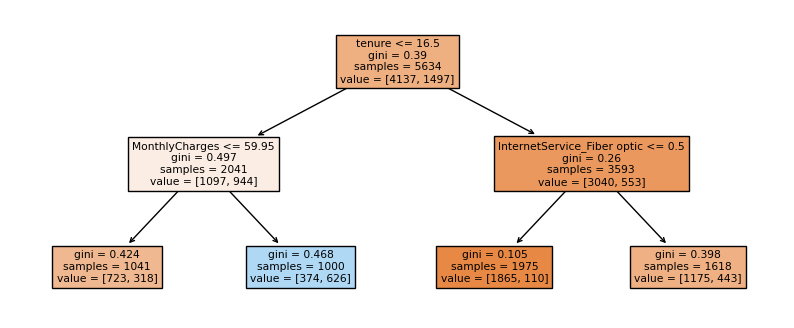

In [14]:
# Specify model parameters
criterion = 'gini'
min_samples_leaf = 1000

# Build model
model = DecisionTreeClassifier(criterion=criterion, min_samples_leaf=min_samples_leaf)

# Fit model on training data
model.fit(X_train, y_train)

# Visualize the decision tree
feature_names = X_train.columns.tolist()
plt.figure(figsize=(10, 4))
plot_tree(model, filled=True, feature_names=feature_names)
plt.show()

## Evaluate model

In [15]:
# Predict test data
y_pred = model.predict(X_test)

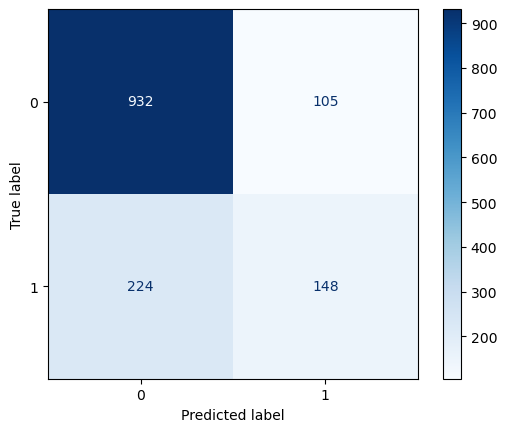

In [16]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [17]:
# Check test accuracy
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy_test:.2f}")

Test accuracy: 0.77


## Model improvement

To improve the model, we will experiment with two hyperparameters:
* ```criterion```
* ```min_samples_leaf```

We will first define the hyperparameter grid for ```criterion``` and ```min_samples_leaf```, which contains values for these two hyperparameters that we will be experimenting with. Then, we will use ```GridSearchCV``` to perform a grid search to obtain the optimal values of the two hyperparameters.

In [18]:
# Define hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]
}

In [19]:
# Perform grid search with 10-fold cross-validation
model = DecisionTreeClassifier()
cv = KFold(n_splits=10, shuffle=True, random_state=9002)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train);

In [20]:
# Display best params and best validation score
print("Best parameters:", grid_search.best_params_)
print(f"Best average cross-validation score: {grid_search.best_score_:.2f}")

Best parameters: {'criterion': 'gini', 'min_samples_leaf': 100}
Best average cross-validation score: 0.80


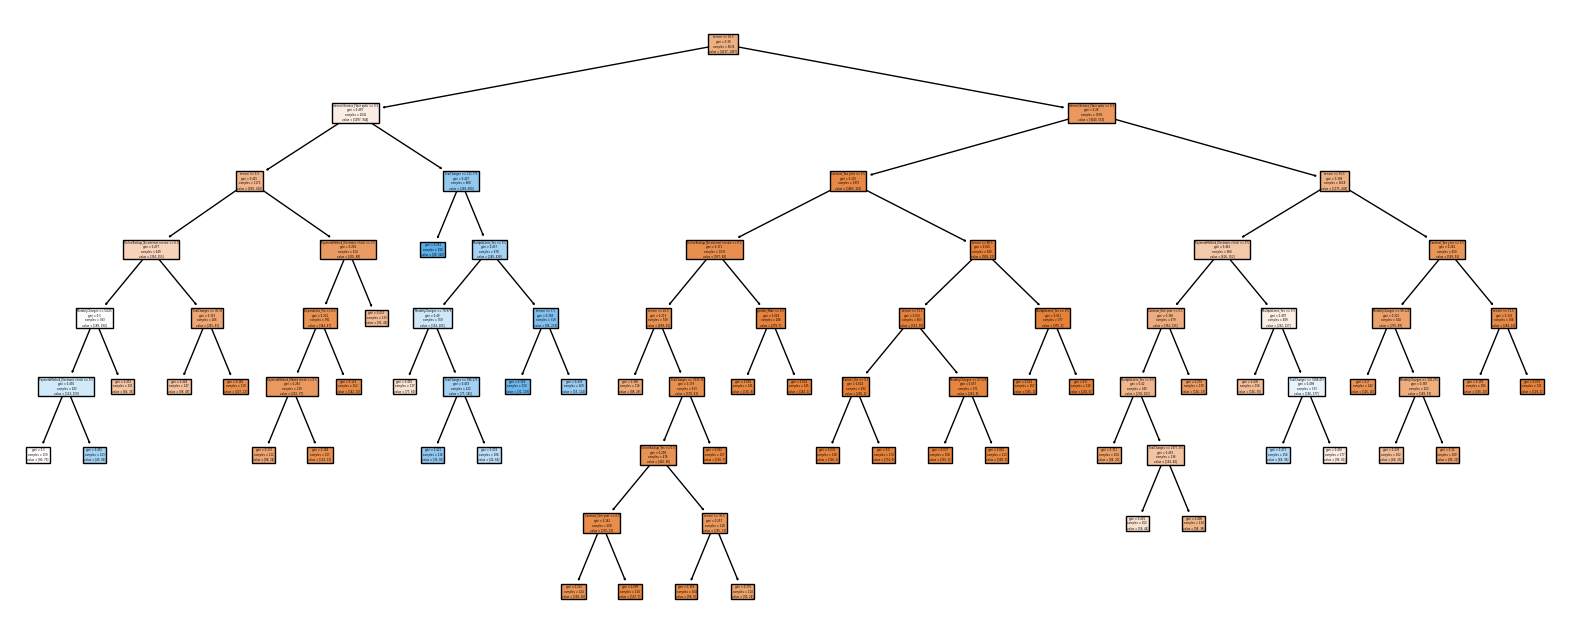

In [21]:
# Fit optimal model using best params found above
optimal_model = grid_search.best_estimator_

# Visualize the optimal decision tree
plt.figure(figsize=(20, 8))
plot_tree(optimal_model, filled=True, feature_names=feature_names)
plt.show()

In [22]:
# Apply the optimal model on the test data
y_test_pred = optimal_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy: {test_accuracy:.2f}")

Test accuracy: 0.79


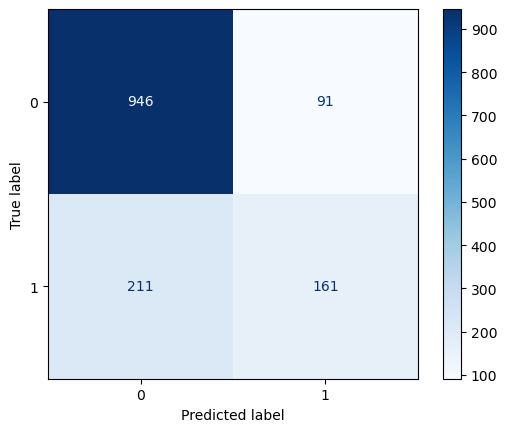

In [23]:
# Generate confusion matrix for optimal model
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()